# To Make Live Predictions Using a Trained AlexNet CNN

In [20]:
import random, os, sys

from PIL import Image
import PIL

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras import models
import pickle


from skimage import io, color, filters
from skimage.transform import resize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 20})
import h5py

!pip install -q h5py pyyaml

In [25]:
# Run this ONLY if I want to clear the entire session from memory *****

# clear_session()

## Model Architecture:

In [22]:
def build_alexnet():
    model = Sequential()
    
    model.add(Conv2D(96, (11,11), input_shape=(224,224,3), strides=(4,4), activation='relu', 
                     padding='VALID'))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID',
                          input_shape=(27,27,1)))
    
    model.add(Conv2D(256, (5,5), strides=(1,1), activation='relu',
                    padding='SAME', input_shape=(27,27)))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID',
                           input_shape=(13,13)))
    
    model.add(Conv2D(384, (3,3), input_shape=(13,13), strides=(1,1),
                     activation='relu', padding='SAME'))
    
    model.add(Conv2D(384, (3,3), input_shape=(13,13), strides=(1,1), activation='relu',
                    padding='SAME'))
    
    model.add(Conv2D(256, (3,3), input_shape=(13,13), strides=(1,1), activation='relu',
                    padding='SAME'))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID'))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(lr=0.0001), 
                  metrics=[BinaryCrossentropy(), 'accuracy'])
    
    return model

## Building ImageDataGenerators and Fitting

In [26]:
alexnet = build_alexnet()

batch_size=32
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.025, patience=25)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # no transformations for test

train_generator = train_datagen.flow_from_directory('data/archive/train_another', batch_size=batch_size,
                                    shuffle=True, class_mode='binary', target_size=(224,224)) #128,128

validation_generator = test_datagen.flow_from_directory('data/archive/validation_another', batch_size=batch_size,
                                         shuffle=True, class_mode='binary', target_size=(224,224)) #128,128


hist1 = alexnet.fit(train_generator, epochs=200,
                         validation_data=validation_generator, callbacks=[es])

score = alexnet.evaluate(validation_generator, verbose=0)

print('Loss:',score[1])
print('Validation Accuracy:',score[2])

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/200
313/313 [==============================] - 15s 46ms/step - loss: 0.5845 - binary_crossentropy: 0.5845 - accuracy: 0.6639 - val_loss: 0.3664 - val_binary_crossentropy: 0.3664 - val_accuracy: 0.8195
Epoch 2/200
313/313 [==============================] - 14s 45ms/step - loss: 0.3247 - binary_crossentropy: 0.3247 - accuracy: 0.8635 - val_loss: 0.2859 - val_binary_crossentropy: 0.2859 - val_accuracy: 0.8880
Epoch 3/200
313/313 [==============================] - 14s 45ms/step - loss: 0.2708 - binary_crossentropy: 0.2708 - accuracy: 0.8954 - val_loss: 0.2469 - val_binary_crossentropy: 0.2469 - val_accuracy: 0.9095
Epoch 4/200
313/313 [==============================] - 14s 45ms/step - loss: 0.2301 - binary_crossentropy: 0.2301 - accuracy: 0.9123 - val_loss: 0.2384 - val_binary_crossentropy: 0.2384 - val_accuracy: 0.9000
Epoch 5/200
313/313 [==============================] - 14s 45ms/step - loss: 0.

Epoch 40/200
313/313 [==============================] - 15s 46ms/step - loss: 0.0243 - binary_crossentropy: 0.0243 - accuracy: 0.9923 - val_loss: 0.1892 - val_binary_crossentropy: 0.1892 - val_accuracy: 0.9570
Epoch 41/200
313/313 [==============================] - 14s 45ms/step - loss: 0.0178 - binary_crossentropy: 0.0178 - accuracy: 0.9944 - val_loss: 0.2466 - val_binary_crossentropy: 0.2466 - val_accuracy: 0.9510
Epoch 42/200
313/313 [==============================] - 14s 46ms/step - loss: 0.0182 - binary_crossentropy: 0.0182 - accuracy: 0.9941 - val_loss: 0.1976 - val_binary_crossentropy: 0.1976 - val_accuracy: 0.9575
Epoch 43/200
313/313 [==============================] - 14s 46ms/step - loss: 0.0107 - binary_crossentropy: 0.0107 - accuracy: 0.9954 - val_loss: 0.2300 - val_binary_crossentropy: 0.2300 - val_accuracy: 0.9545
Epoch 44/200
313/313 [==============================] - 14s 45ms/step - loss: 0.0188 - binary_crossentropy: 0.0188 - accuracy: 0.9940 - val_loss: 0.1829 - val_b

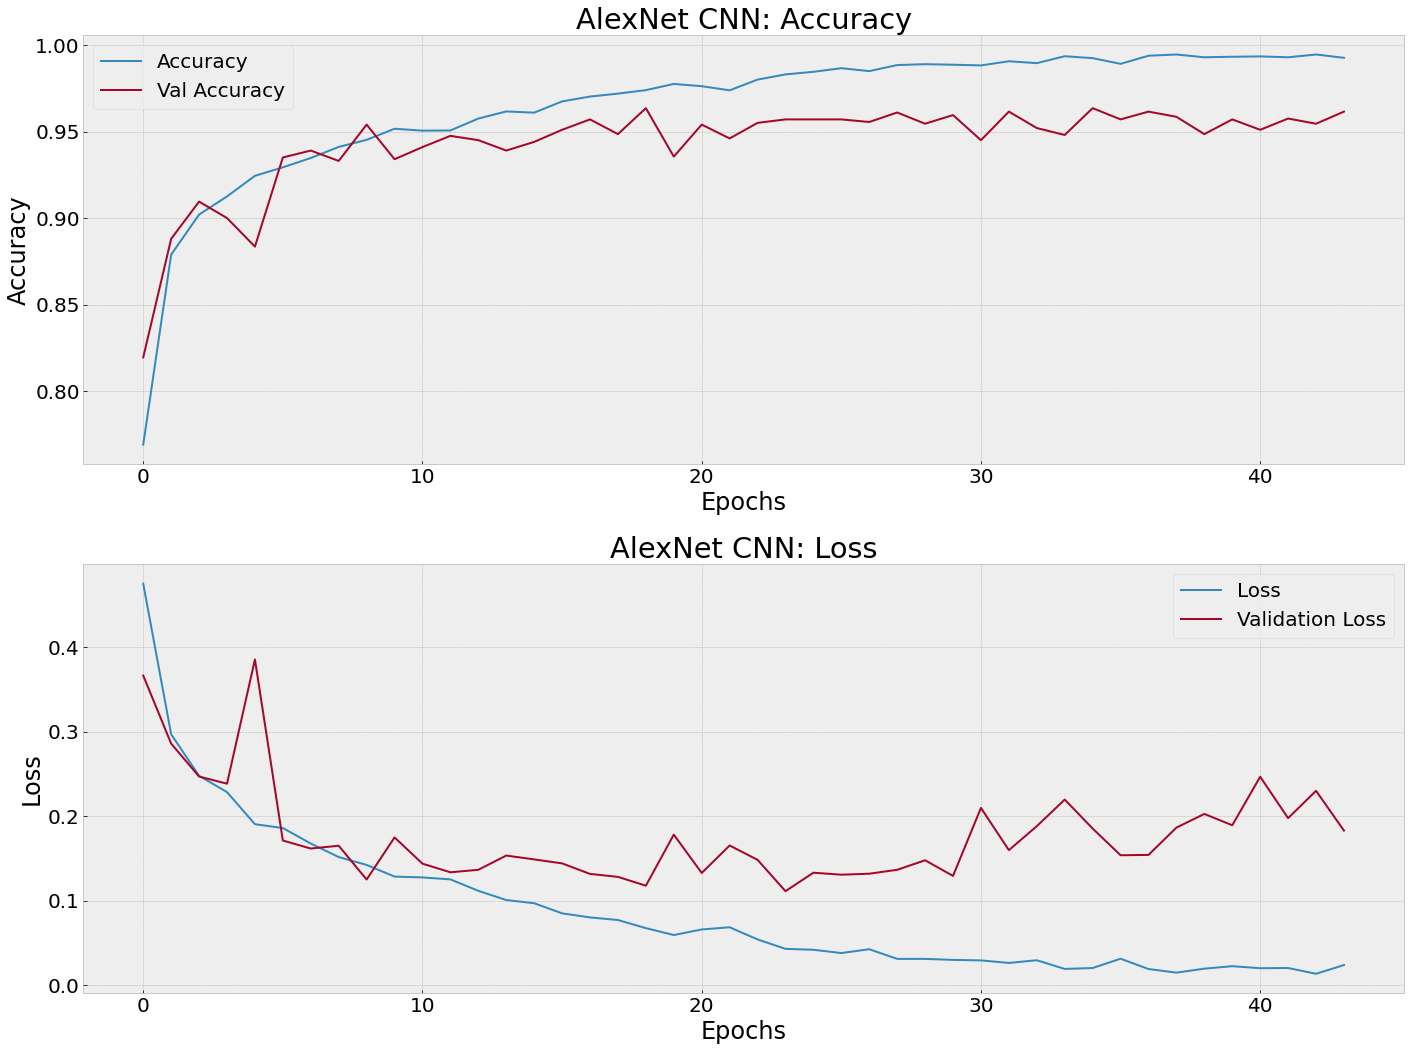

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(20,15))

accuracy = hist1.history['accuracy']
val_accuracy = hist1.history['val_accuracy']

loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

ax[0].plot(accuracy, label='Accuracy')
ax[0].plot(val_accuracy, label='Val Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('AlexNet CNN: Accuracy')
ax[0].legend();


ax[1].plot(loss, label='Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('AlexNet CNN: Loss')
ax[1].legend()

plt.tight_layout();

In [28]:
# saving the model

alexnet.save('alexnet3.h5')

In [16]:
# from tensorflow.keras import backend

# K = backend.backend()
# if K=='tensorflow':
#     backend.set_image_data_format('channels_last')

In [29]:
# alexnet = tf.keras.models.load_model('alexnet1.h5', custom_objects=False)

# alexnet = tf.keras.models.load_model('alexnet3.h5')

## Using the Trained Model To Make Some Predictions:

### Class object to predict and display:

In [197]:
test_path = 'data/archive/test'

class Predict():
    
    def __init__(self, path):
        self.path = path
        

        self.predict_datagen = ImageDataGenerator(rescale=.1/255)
        
        self.prediction_generator = self.predict_datagen.flow_from_directory(self.path,
                                    batch_size=1, shuffle=True, class_mode='binary', target_size=(224,224), color_mode='rgb')
        
        
    def predict_and_display(self):
        image, label = next(prediction_generator)
        
        self.x = image
            
        io.imshow(self.x.reshape(224,224,3))
        if label == 0:
            label = 'Damaged'
        else:
            label = "Not Damaged"
        if (alexnet.predict(self.x) > 0.5).astype("int32") == 0:
            return f'Classified as : Damaged, Labeled as: {label}'
        return f'Classified as: Not Damaged, Labeled as: {label}'
        

In [55]:
# alexnet = tf.keras.models.load_model('alexnet3.h5')

### Predicting and displaying:

Found 2000 images belonging to 2 classes.


'Classified as : Damaged, Labeled as: Damaged'

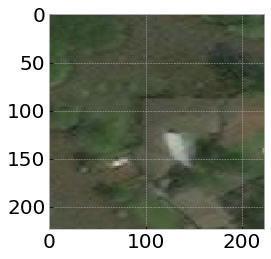

In [219]:
Predict(test_path).predict_and_display()